In [1]:
#import pandas_datareader.data as pdr
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('APPLE.csv.txt')

In [3]:
data.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [8]:
data['date']=pd.to_datetime(data['date'])

In [9]:
df=data.reset_index()['close']

In [10]:
data['close'].head()

0    132.045
1    131.780
2    130.280
3    130.535
4    129.960
Name: close, dtype: float64

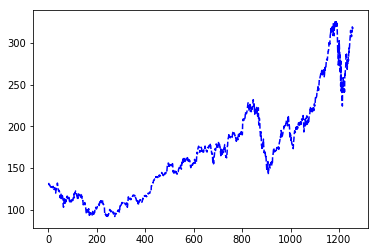

In [11]:
plt.figure()
plt.plot(data['close'],'--',color='b')

In [28]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [12]:
scaler=MinMaxScaler().fit(np.array(data['close']).reshape(-1,1))
df1=scaler.transform(np.array(data['close']).reshape(-1,1))

In [13]:
df1

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

In [14]:
training_size=int(len(df1)*.7)
test_size=len(df1)-training_size


In [15]:
(training_size,test_size)

(880, 378)

In [16]:
len(df1)

1258

In [17]:
train_data,test_data=(df1[:training_size],df1[training_size:])

In [18]:
train_data.shape

(880, 1)

In [19]:
def create_dataset(dataset,time_step):
    data_x,data_y=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:i+time_step,0]
        data_x.append(a)
        data_y.addend(dataset[i+time_step,0])
    return(np.array(data_x),np.array(data_y))
        
        

In [20]:
def create_dataset(dataset,time_step):
    data_x,data_y=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:i+time_step]
        data_x.append(a)
        data_y.append(dataset[i+time_step])
    return(np.array(data_x),np.array(data_y))

In [21]:
time_step=100

In [22]:
X_train,y_train=create_dataset(train_data,time_step)

In [23]:
X_train.shape

(779, 100, 1)

In [24]:
X_test,y_test=create_dataset(test_data,time_step)

In [25]:
y_test.shape

(277, 1)

In [29]:
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [30]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [31]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64)

Instructions for updating:
Use tf.cast instead.
Train on 779 samples, validate on 277 samples
Epoch 1/100
779/779 [==============================] - 17s 21ms/step - loss: 0.0309 - acc: 0.0013 - val_loss: 0.0318 - val_acc: 0.0036
Epoch 2/100
779/779 [==============================] - 5s 6ms/step - loss: 0.0051 - acc: 0.0013 - val_loss: 0.0050 - val_acc: 0.0036
Epoch 3/100
779/779 [==============================] - 5s 6ms/step - loss: 0.0019 - acc: 0.0013 - val_loss: 0.0047 - val_acc: 0.0036
Epoch 4/100
779/779 [==============================] - 5s 6ms/step - loss: 0.0011 - acc: 0.0013 - val_loss: 0.0045 - val_acc: 0.0036
Epoch 5/100
779/779 [==============================] - 5s 6ms/step - loss: 7.2506e-04 - acc: 0.0013 - val_loss: 0.0047 - val_acc: 0.0036
Epoch 6/100
779/779 [==============================] - 5s 6ms/step - loss: 6.6851e-04 - acc: 0.0013 - val_loss: 0.0045 - val_acc: 0.0036
Epoch 7/100
779/779 [==============================] - 5s 6ms/step - loss: 6.6636e-04 - acc: 0.001

779/779 [==============================] - 8s 11ms/step - loss: 3.1368e-04 - acc: 0.0013 - val_loss: 0.0029 - val_acc: 0.0036
Epoch 59/100
779/779 [==============================] - 5s 6ms/step - loss: 3.3281e-04 - acc: 0.0013 - val_loss: 0.0015 - val_acc: 0.0036
Epoch 60/100
779/779 [==============================] - 5s 6ms/step - loss: 3.0508e-04 - acc: 0.0013 - val_loss: 0.0023 - val_acc: 0.0036
Epoch 61/100
779/779 [==============================] - 7s 9ms/step - loss: 3.0421e-04 - acc: 0.0013 - val_loss: 0.0014 - val_acc: 0.0036
Epoch 62/100
779/779 [==============================] - 7s 8ms/step - loss: 3.0126e-04 - acc: 0.0013 - val_loss: 0.0028 - val_acc: 0.0036
Epoch 63/100
779/779 [==============================] - 5s 6ms/step - loss: 2.7734e-04 - acc: 0.0013 - val_loss: 0.0015 - val_acc: 0.0036
Epoch 64/100
779/779 [==============================] - 6s 8ms/step - loss: 3.3617e-04 - acc: 0.0013 - val_loss: 0.0030 - val_acc: 0.0036
Epoch 65/100
779/779 [========================

In [37]:
from sklearn.metrics import mean_squared_error

In [185]:
train_predict=scaler.inverse_transform(model.predict(X_train))
test_predict=scaler.inverse_transform(model.predict(X_test))

In [42]:
import math

In [78]:
math.sqrt(mean_squared_error(scaler.inverse_transform(y_train),train_predict))

3.186186457216864

In [79]:
math.sqrt(mean_squared_error(y_train,model.predict(X_train)))

0.013451771404837751

In [46]:
math.sqrt(mean_squared_error(y_test,test_predict))

248.24619987719683

# PREDICTION VISUALIZATION

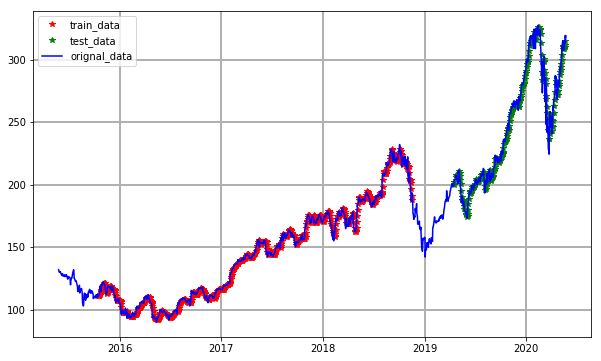

In [186]:
plt.figure(figsize=(10,6))
plt.plot(data['date'][100:879],train_predict,'*',color='r',label='train_data')
plt.plot(data['date'][979:len(data)-2],test_predict,'*',color='g',label='test_data')
plt.plot(data['date'],data['close'],'-',color='b',label='orignal_data')
plt.legend()
plt.grid(linewidth=2)

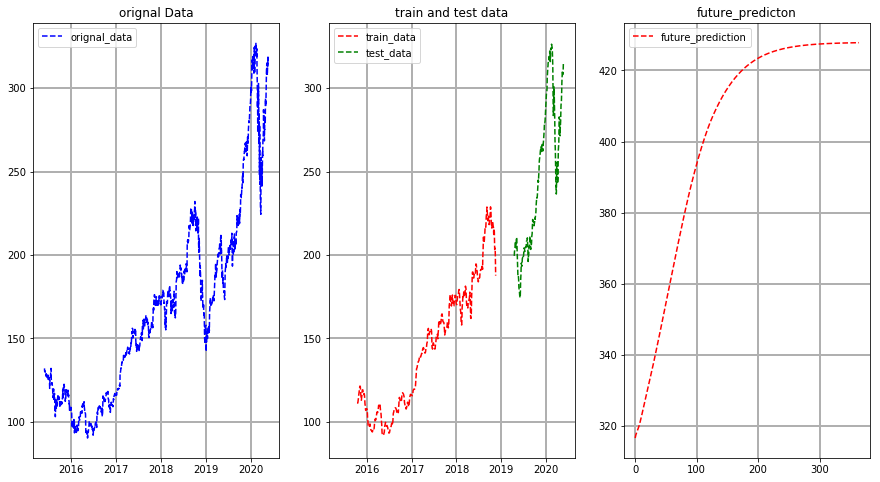

In [196]:
plt.figure(figsize=(15,8))
a=plt.subplot(1,3,1)
plt.plot(data['date'],data['close'],'--',color='b',label='orignal_data')
plt.title('orignal Data')
plt.legend()
plt.grid(linewidth=2)
plt.subplot(1,3,2,sharex=a,sharey=a)
plt.plot(data['date'][100:879],train_predict,'--',color='r',label='train_data')
plt.plot(data['date'][979:len(data)-2],test_predict,'--',color='g',label='test_data')
plt.title('train and test data')
plt.legend()
plt.grid(linewidth=2)
plt.subplot(1,3,3)
plt.plot(future_prediction,'--',color='r',label='future_prediction')
plt.title('future_predicton')
plt.legend()
plt.grid(linewidth=2)



In [55]:
len(train_predict)

779

In [118]:
test_data.shape

(378, 1)

In [119]:
X_test.shape

(277, 100, 1)

In [190]:
pred=y_test[-100:]

pred=pred.tolist()

In [191]:
i=0
l=[]
for i in range (0,365):
    yhat=model.predict(np.array(pred).reshape(1,100,1))
    l.append(yhat.tolist()[0])
    pred.append(yhat.tolist()[0])
    pred=pred[1:]
    

In [192]:
future_prediction=scaler.inverse_transform(l)

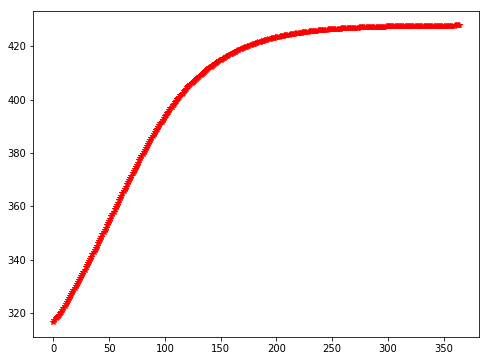

In [193]:
plt.figure(figsize=(8,6))
plt.plot(future_prediction,'*',color='r')